In [68]:
import cv2
import os
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
import json
import colorsys
import pandas as pd
import seaborn as sns
from random import randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
camry_path = 'data/training/vehicle_images/camry_binary'
minivan_path = 'data/training/vehicle_images/minivan_binary'
suv_path = 'data/training/vehicle_images/suv_binary'

In [3]:
vehicle_paths = [camry_path, minivan_path, suv_path]

In [4]:
training_images = []
labels = []

In [5]:
for path in vehicle_paths:
    for image in os.listdir(path):
        image = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

        _, binary_image = cv2.threshold(image, 128, 1, cv2.THRESH_BINARY)  
        binary_image = cv2.resize(binary_image, (32,64))
        binary_image = binary_image.reshape(-1,1)

        training_images.append(binary_image)
        labels.append(1)
training_images = np.array(training_images)

In [6]:
blobs = np.array([np.array([randint(0,1) for _ in range(2048)]) for _ in range(len(training_images))])
for _ in blobs:
    labels.append(0)

In [7]:
labels = np.array(labels)
training_images = np.squeeze(training_images, axis=2)

In [8]:
x_train,X_test,y_train, y_test = train_test_split(np.concatenate([training_images, blobs]), labels, test_size=0.3,random_state=102)

In [9]:
model = Sequential()
model.add(Dense(2048, activation='sigmoid'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(optimizer='rmsprop', loss='mse')

In [11]:
model.fit(x=x_train, y=y_train, epochs=30)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 34955.0781
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.2819
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.2103
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.3607
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.1584
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.1006
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.2231
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0077
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.1444
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.1181
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0111
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.4337
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.3708
Epoch 14/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.3551
Epoch 15/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0425
Epoch 16/30
9/9

Found 95 files belonging to 2 classes.
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.6875 - loss: 0.2607
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7083 - loss: 0.2917
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6875 - loss: 0.3125
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6146 - loss: 0.3854
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6458 - loss: 0.3542
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.6354 - loss: 0.3646
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6771 - loss: 0.3229
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6250 - loss: 0.3750
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7188 - loss: 0.2812
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6667 - loss: 0.3333
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6667 - loss: 0.3333
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━

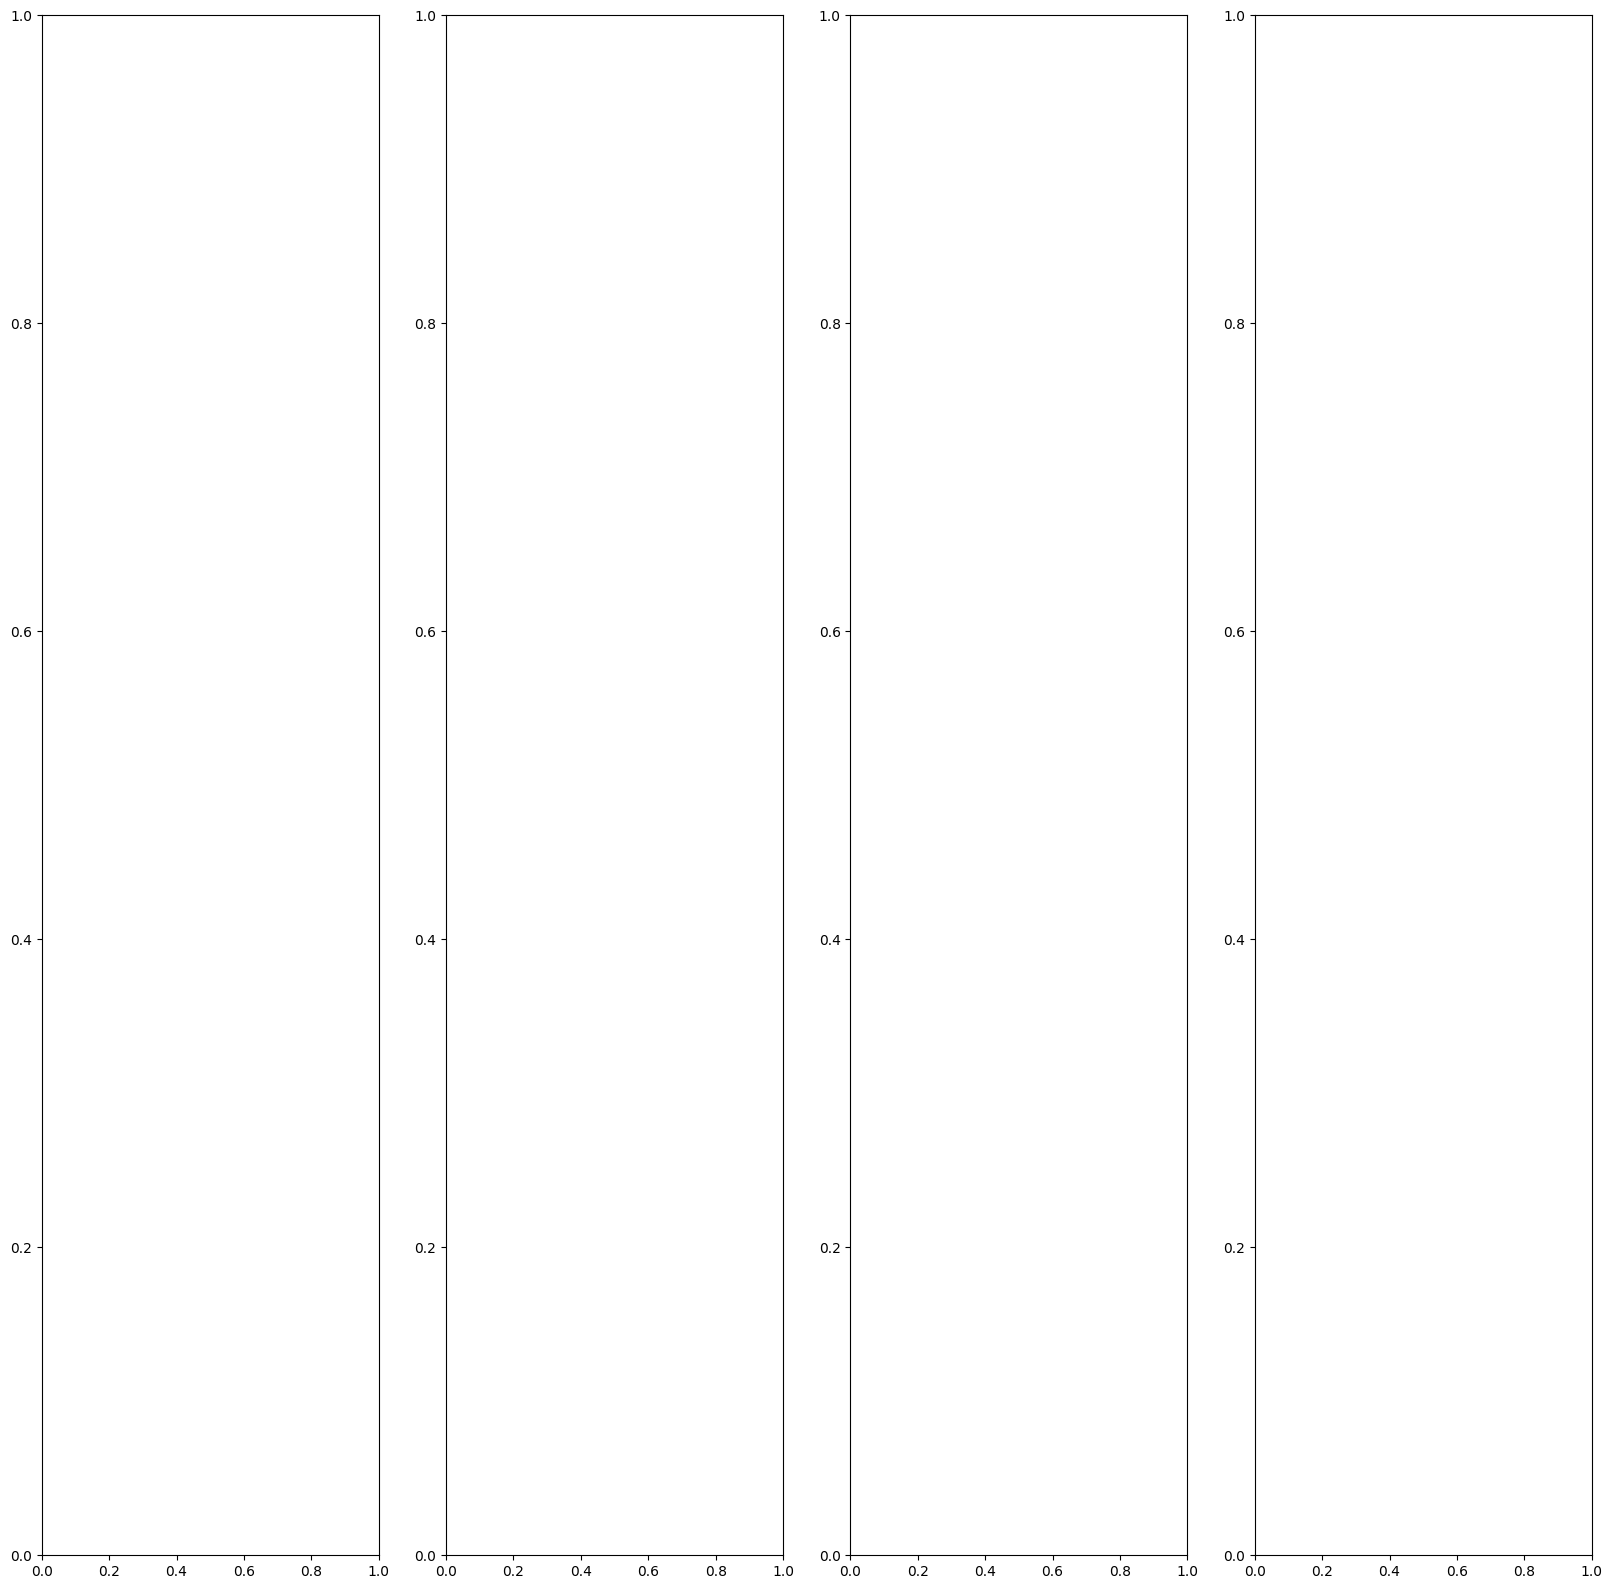

In [49]:
# Testing
data_dir = 'dataclassifier'
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
data = data.map(lambda x,y: (x/255, y))
    
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile('rmsprop', loss='mse', metrics=['accuracy'])
hist = model2.fit(train, epochs=50)


In [67]:
data = np.array([
        [199,199,207,'White'],
        [85,85,85,'Black'],
        [124,124,124,'White'],
        [88,88,88,'Black'],
        [83,84,86,'Red'],
        [79,73,71,'Red'],
       ])

# Create the structured array

X = data[:, :3].astype(int)
y = data[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.8808101]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.672318]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.8027216]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.8023668]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.7131977]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.7132364]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.712525]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.8326468]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.17835703]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.20308751]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

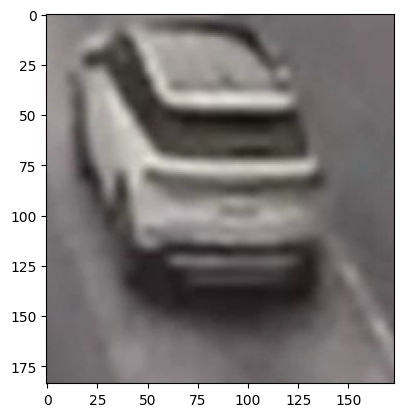

In [75]:
video = 'vid1.mp4'
vid = cv2.VideoCapture(f'data/videos/{video}')
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=False)
frame_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))


def get_dominant_color(image, contour):
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    x, y, w, h = cv2.boundingRect(contour)
    img = image[y:y+h, x:x+w]
    plt.imshow(img)
    mask2 = np.zeros(img.shape[:2], np.uint8)
    mean_color = cv2.mean(img)
    return mean_color
def isCar(image, contour):
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    x, y, w, h = cv2.boundingRect(contour)
    img = image[y:y+h, x:x+w]
    resize = tf.image.resize(img,(256,256))
    yhat = model2.predict(np.expand_dims(resize/255,0))
    print(yhat)
    return yhat
    
while (vid.isOpened()):
    # Read a frame from the video
    ret, frame = vid.read()
    if not ret:
        break
    # Apply the background subtractor to the frame
    fg_mask = back_sub.apply(frame)
    
    # Apply a binary threshold to clean up the mask
    _, binary = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Morphological operations to remove small noise
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_open, iterations=2)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_close, iterations=2)

    # Find contours to identify large moving objects (cars)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a new mask to draw detected cars
    cnum = 0
    mask = np.zeros_like(binary)
    for index,contour in enumerate(contours):
        # Filter out small contours based on area
        if cv2.contourArea(contour) > 500:  # Adjust this threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            obj = []
            for i in range(y, (y+h+1)):
                for j in range(x, (x+w+1)):
                    if [j,i] in contour:
                        obj.append(1)
                    else:
                        obj.append(0)
            
            obj = np.array(obj, dtype=np.uint8)
            obj = cv2.resize(obj, (32,64))
            obj = obj.reshape(1,-1)
            
            if model.predict(obj) < 0:
                continue
            isACar = isCar(frame,contour)
            if(isACar <= 0.4):
                color = get_dominant_color(frame,contour)
                r = color[0]
                g = color[1]
                b = color[2]
    
                
                cnum += 1
                type = "CAR"
                if(isACar <= 0.4):
                    type = "CAR"
                cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
                cv2.putText(frame, f"CAR {cnum}: ", (x,y+-0), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (r,g,b), 2)
    cv2.putText(frame, f"{cnum} cars currently on screen.", (+30,+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    out.write(frame)
            

In [73]:
out.release()